In [77]:

from keras.datasets import imdb
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt


# Hidden Layers Model

In [83]:

def vectorize_sequences(sequences, dim):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

class HiddenLayers():
    
    def __init__(self, n_layers, input_shape, loss="mse", activation="relu"):
        self.n_layers = n_layers
        self.input_shape = input_shape
        self.model = self.build_model(loss, activation)

    def _plot(self, history, n_epochs):
        plt_title = f'{self.n_layers} layer(s)'

        loss_values = history.history['loss']
        val_loss_values = history.history['val_loss']
        
        epochs = range(1, n_epochs + 1)

        plt.plot(epochs, loss_values, 'bo', label='Training loss')
        plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
        plt.title(f'Training and Validation Loss, {plt_title}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
    def build_model(self, loss, activation, n_units=2):
        
        model = models.Sequential()
        model.add(layers.Dense(n_units, activation=activation, input_shape=(self.input_shape,)))

        for _ in range(1, self.n_layers - 1):  # Adjust to add n-2 hidden layers as the first layer is already added
            model.add(layers.Dense(n_units, activation=activation))
        # Ensure there's at least one hidden layer to add the output layer
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer='rmsprop',
                    loss=loss,
                    metrics=['accuracy'])

        return model

    def fit_model(self, x_train, y_train, x_val, y_val, n_epochs=10):
        history = self.model.fit(
                            x_train,
                            y_train,
                            epochs=n_epochs,
                            batch_size=512,
                            validation_data=(x_val, y_val)
                            )
        
        self._plot(history, n_epochs)
        return history


# Fit Model and Plot Loss

In [87]:

input_shape = samples = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=input_shape)

# vectorize data and its labels
x_train = vectorize_sequences(train_data, samples)
x_test = vectorize_sequences(test_data, samples)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val, partial_x_train = x_train[:input_shape], x_train[input_shape:]
y_val, partial_y_train = y_train[:input_shape],  y_train[input_shape:]


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6043 - loss: 0.2323 - val_accuracy: 0.6589 - val_loss: 0.1985
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7640 - loss: 0.1863 - val_accuracy: 0.7652 - val_loss: 0.1801
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8369 - loss: 0.1698 - val_accuracy: 0.8304 - val_loss: 0.1702
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8796 - loss: 0.1564 - val_accuracy: 0.8510 - val_loss: 0.1638
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9034 - loss: 0.1496 - val_accuracy: 0.8641 - val_loss: 0.1590
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9180 - loss: 0.1417 - val_accuracy: 0.8716 - val_loss: 0.1550
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9305 - loss: 0.1354 - val_accuracy: 0.8701 - val_loss: 0.1516
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9352 - loss: 0.1311 - val_accuracy: 0.8688 - val_loss

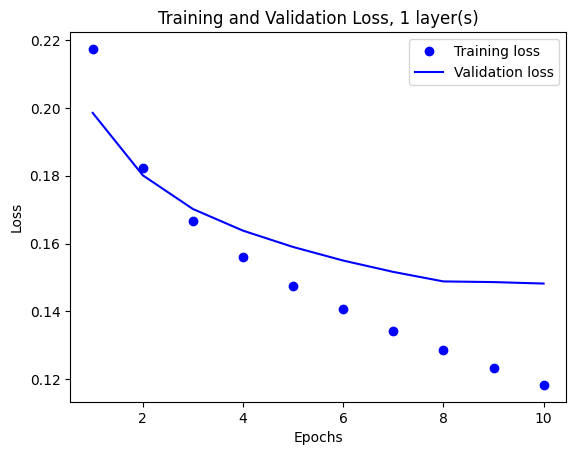

In [96]:


n_layers = 1

# hidden = HiddenLayers(n_layers, input_shape, loss="binary_crossentropy")
hidden = HiddenLayers(n_layers, input_shape, loss="mse")
hidden.fit_model(partial_x_train, partial_y_train, x_val, y_val)



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6574 - loss: 0.2271 - val_accuracy: 0.8359 - val_loss: 0.1657
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8678 - loss: 0.1474 - val_accuracy: 0.8617 - val_loss: 0.1342
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8977 - loss: 0.1155 - val_accuracy: 0.8759 - val_loss: 0.1159
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9133 - loss: 0.0950 - val_accuracy: 0.8820 - val_loss: 0.1054
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9212 - loss: 0.0837 - val_accuracy: 0.8860 - val_loss: 0.0983
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9274 - loss: 0.0749 - val_accuracy: 0.8881 - val_loss: 0.0938
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9393 - loss: 0.0669 - val_accuracy: 0.8893 - val_loss: 0.0908
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.0610 - val_accuracy: 0.8898 - val_loss

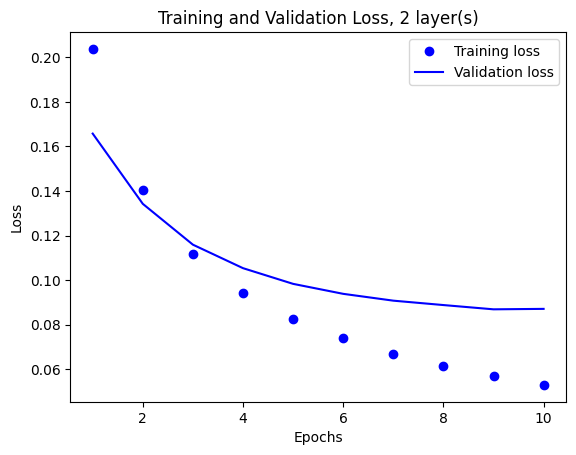

In [97]:


n_layers = 2

hidden = HiddenLayers(n_layers, input_shape, loss="mse")
hidden.fit_model(partial_x_train, partial_y_train, x_val, y_val)



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5489 - loss: 0.2496 - val_accuracy: 0.5769 - val_loss: 0.2474
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6085 - loss: 0.2463 - val_accuracy: 0.6277 - val_loss: 0.2420
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6480 - loss: 0.2401 - val_accuracy: 0.6503 - val_loss: 0.2347
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6791 - loss: 0.2321 - val_accuracy: 0.6975 - val_loss: 0.2258
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7228 - loss: 0.2230 - val_accuracy: 0.7305 - val_loss: 0.2161
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7477 - loss: 0.2121 - val_accuracy: 0.7711 - val_loss: 0.2062
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7780 - loss: 0.2016 - val_accuracy: 0.7764 - val_loss: 0.1965
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8002 - loss: 0.1921 - val_accuracy: 0.7889 - val_loss

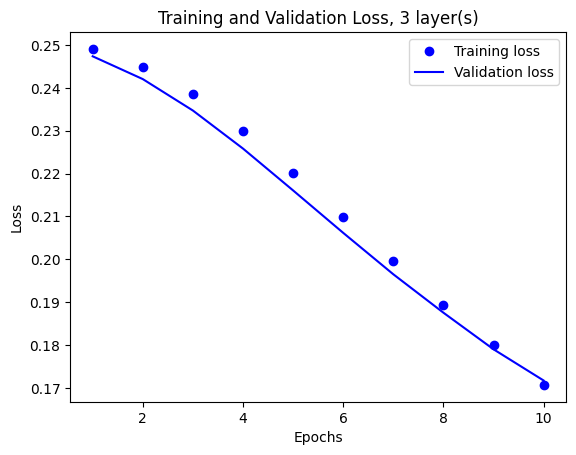

In [98]:


n_layers = 3

# hidden = HiddenLayers(n_layers, input_shape, loss="binary_crossentropy")
hidden = HiddenLayers(n_layers, input_shape, loss="mse")
hidden.fit_model(partial_x_train, partial_y_train, x_val, y_val)



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5338 - loss: 0.2447 - val_accuracy: 0.5765 - val_loss: 0.2317
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6422 - loss: 0.2248 - val_accuracy: 0.7196 - val_loss: 0.2147
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7345 - loss: 0.2065 - val_accuracy: 0.7532 - val_loss: 0.1999
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.1904 - val_accuracy: 0.8026 - val_loss: 0.1873
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8284 - loss: 0.1766 - val_accuracy: 0.8216 - val_loss: 0.1768
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8531 - loss: 0.1650 - val_accuracy: 0.8262 - val_loss: 0.1686
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8747 - loss: 0.1558 - val_accuracy: 0.8530 - val_loss: 0.1609
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8963 - loss: 0.1452 - val_accuracy: 0.8499 - val_loss

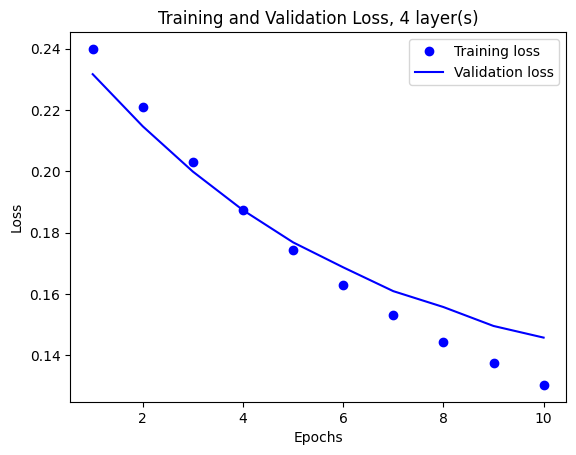

In [100]:


n_layers = 4

hidden = HiddenLayers(n_layers, input_shape, loss="mse")
hidden.fit_model(partial_x_train, partial_y_train, x_val, y_val)



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4948 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5103 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5036 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4987 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5102 - loss: 0.2499 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5022 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2500
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5082 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss: 0.2501
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5058 - loss: 0.2500 - val_accuracy: 0.4947 - val_loss

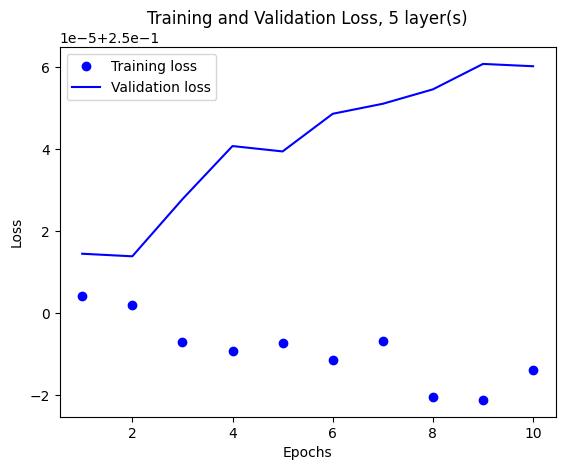

In [99]:


n_layers = 5

hidden = HiddenLayers(n_layers, input_shape, loss="mse")
hidden.fit_model(partial_x_train, partial_y_train, x_val, y_val)

